In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from midiutil import MidiFile
import math
from math import pow

In [10]:
def getTransitionBeats(bpm0, bpm1, staticBeats, changeBeats):
    # duration in minutes of tempo ramp
    duration = 1./bpm0 * staticBeats

    # We know how long our change will take.
    # Find our starting acceleration
    numerator = (6. * changeBeats) - 2. * duration * (bpm1 + (2. * bpm0))
    startingAcceleration = numerator / (duration * duration)

    # Solve equation 3.2 to find the final acceleration
    numerator = 2. * (bpm1 - bpm0 - (startingAcceleration * duration))
    finalAcceleration = numerator / pow(duration, 2)
    # We now have starting/final Acceleration

    # Calculate the number of beats elapsed in the tempo
    # ramp given a time in minutes
    def beatsElapsed(acc0, acc1, time):
        part1 = acc0 * pow(time, 2.) / 2.
        part2 = acc1 * pow(time, 3.) / 6.
        return bpm0 * time + part1 + part2
    
    # 1. The number of beats that have elapsed in our tempo ramp 
    beatPosition = []
    # 2. Time elapsed in minutes
    timeElapsed = []

    # Populate the two parallel arrays
    for time in np.arange(0, duration, 0.000001):
        timeElapsed.append(time)
        beatPosition.append(beatsElapsed(startingAcceleration, finalAcceleration, time))
    
    # np.arange goes up to, but does not include the max value.
    # However, we know the max value, and the max duration
    beatPosition.append(changeBeats)
    timeElapsed.append(duration)

    times = []
    lookingForBeat = 0
    for beatsElapsed, time in zip(beatPosition, timeElapsed):
        if beatsElapsed >= lookingForBeat:
            times.append(time)
            lookingForBeat += 1

    return np.array(times)

def getStaticBeats(bpm, end):
    times = [float(i) / bpm for i in range(int(end + 1))]
    return np.array(times)

def getDiffs(array):
    results = []
    for i in range(len(array) - 1):
        results.append(array[i + 1] - array[i])
    return np.array(results)

def midiRamp(midiFile, ratio, staticBeats, changeBeats, pitch=60):
    """
    Given a MIDIFile instance from the midiutil package, add a tempo ramp
    from the midifile's tempo to a new tempo.
    
    Args:
        midiFile (MIDIFile): Add the tempo ramp to the beginning of this object
        ratio    (float): ramp to this tempo times the original tempo
        staticBeats (int): the duration of the ramp measured in beats at initial bpm
        changeBeats (int): number of beats in the changing tempo
        
    """
    bpm0 = 60
    bpm1 = int(ratio * bpm0)
    rampBeatTimes = getTransitionBeats(bpm0, bpm1, staticBeats, changeBeats)
    rampBeatsInBeats = rampBeatTimes * bpm0
    
    channel  = 0
    duration = 0.5 # In beats
    volume   = 100 # 0-127, as per the MIDI standard
    for t in rampBeatsInBeats:
        MyMIDI.addNote(track, channel, pitch, t, duration, volume)
    

    

In [3]:
bpm0 = 60. # starting bpm
bpm1 = 90. # final bpm
staticBeats = 32. # 
changeBeats = 40. # number of beats for changing tempo
rampBeatTimes = getTransitionBeats(bpm0, bpm1, staticBeats, changeBeats)
staticBeatTimes = getStaticBeats(bpm0, staticBeats)
rampBeatDurations = getDiffs(rampBeatTimes)
rampBeatsInBeats = rampBeatTimes * bpm0

[0, 32, -8, 8]

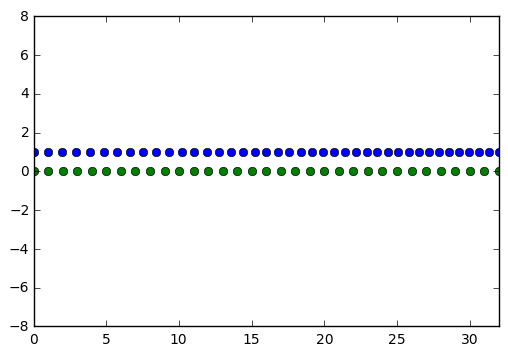

In [4]:
%matplotlib inline

z1 = np.ones(len(rampBeatTimes))
plt.plot(rampBeatTimes * bpm0, z1, 'o')

z2 = np.zeros(len(staticBeatTimes))
plt.plot(staticBeatTimes * bpm0, z2, 'o')
plt.axis([0, 32, -8, 8])

In [12]:
# One track, defaults to format 1 (tempo track automatically created)
MyMIDI = MidiFile.MIDIFile(1, adjust_origin=False)
track    = 0
time     = 0   # In beats
tempo    = 120 # In BPM
MyMIDI.addTempo(track, time, tempo)

chord0    = [52, 55, 60, 62, 64, 69]
rampBeats = [39, 40, 41, 42, 43, 44]

rampBeats.reverse()

for note, beats in zip(chord0, rampBeats):
    midiRamp(MyMIDI, 2, 32, beats, note)

with open("./session/tempo-ramps2.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [18]:
# One track, defaults to format 1 (tempo track automatically created)
MyMIDI = MidiFile.MIDIFile(1, adjust_origin=False)
track    = 0
time     = 0   # In beats
tempo    = 120 # In BPM
MyMIDI.addTempo(track, time, tempo)

midiRamp(MyMIDI, 1.5, 16, 20, 62)

for i in np.arange(0, 32):
    MyMIDI.addNote(0, 0, 60, i, 0.5, 100)

with open("./session/tempo-ramps4.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)


In [20]:
# One track, defaults to format 1 (tempo track automatically created)
MyMIDI = MidiFile.MIDIFile(1, adjust_origin=False)
track    = 0
time     = 0   # In beats
tempo    = 120 # In BPM
MyMIDI.addTempo(track, time, tempo)

midiRamp(MyMIDI, 1.5, 16, 22, 62)

for i in np.arange(0, 32):
    MyMIDI.addNote(0, 0, 60, i, 0.2, 100)

with open("./session/tempo-ramps4.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)
